In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [2]:
#reading and preprocessing datasets
diabetes_dataset = pd.read_csv('diabetes.csv')
print(f'Column names : {list(diabetes_dataset.columns)}')
imp = SimpleImputer(missing_values=np.NaN)
diabetes_dataset = pd.DataFrame(imp.fit_transform(diabetes_dataset), columns=diabetes_dataset.columns)
diabetes_dataset.head()

Column names : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [3]:
X = diabetes_dataset.iloc[:, :-1]
y = diabetes_dataset.iloc[:, -1]

In [4]:
print(f'Dimensions of dataset : {diabetes_dataset.shape}')

Dimensions of dataset : (768, 9)


In [5]:
print(diabetes_dataset.groupby('Outcome').size())

Outcome
0.0    500
1.0    268
dtype: int64


Exploratory analysis of data

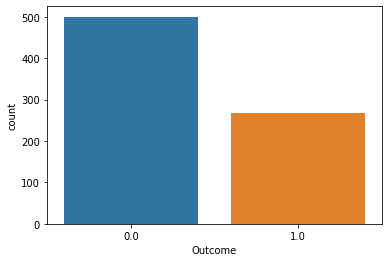

In [6]:
sns.countplot(diabetes_dataset['Outcome'], label='Count')

In [7]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


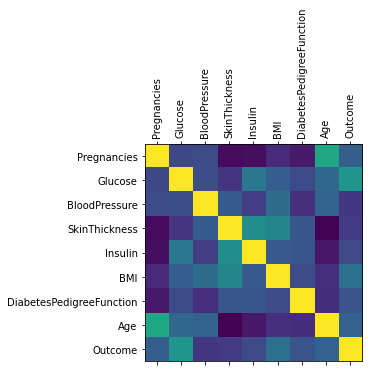

In [8]:
#plotting correlation matrix
fig = plt.figure()
ax = fig.add_subplot()
ax.matshow(diabetes_dataset.corr())
ax.set_xticklabels([' ']+list(diabetes_dataset.columns), rotation=90)
ax.set_yticklabels([' ']+list(diabetes_dataset.columns))
plt.show()

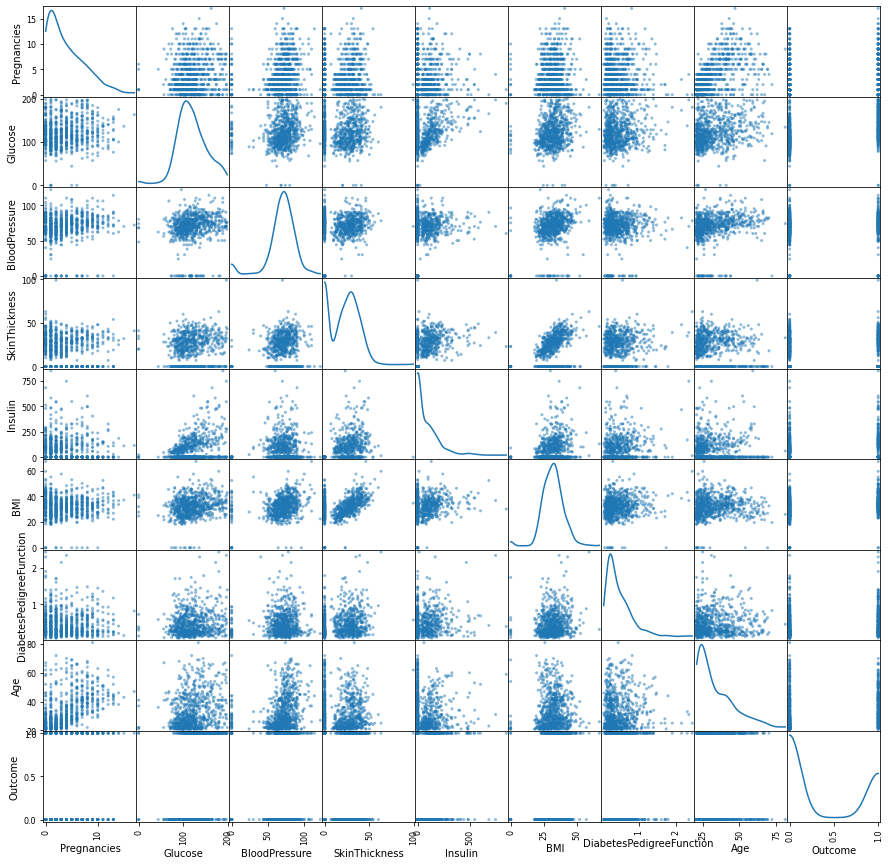

In [9]:
pd.plotting.scatter_matrix(
    diabetes_dataset,
    figsize = [15, 15],
    diagonal='kde'
)
plt.show()

1. K-Nearest Neighbors

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=1)
train_accu = []
test_accu = []
neighbors = range(1, 11)

In [11]:
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accu.append(knn.score(X_train, y_train))
    test_accu.append(knn.score(X_test, y_test))

In [12]:
for i in range(10):
    print(
        f'For {i+1} neighbors algorithm\n',
        f'Training accuracy : {round(train_accu[i], 2)}\tTesting accuracy : {round(test_accu[i], 2)}'
    )

For 1 neighbors algorithm
 Training accuracy : 1.0	Testing accuracy : 0.76
For 2 neighbors algorithm
 Training accuracy : 0.82	Testing accuracy : 0.72
For 3 neighbors algorithm
 Training accuracy : 0.83	Testing accuracy : 0.74
For 4 neighbors algorithm
 Training accuracy : 0.8	Testing accuracy : 0.73
For 5 neighbors algorithm
 Training accuracy : 0.81	Testing accuracy : 0.74
For 6 neighbors algorithm
 Training accuracy : 0.78	Testing accuracy : 0.76
For 7 neighbors algorithm
 Training accuracy : 0.78	Testing accuracy : 0.77
For 8 neighbors algorithm
 Training accuracy : 0.77	Testing accuracy : 0.77
For 9 neighbors algorithm
 Training accuracy : 0.78	Testing accuracy : 0.76
For 10 neighbors algorithm
 Training accuracy : 0.78	Testing accuracy : 0.76


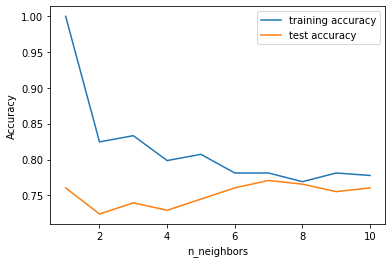

In [13]:
plt.plot(neighbors, train_accu, label="training accuracy")
plt.plot(neighbors, test_accu, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

We get best accuracy at n_neighbors = 9

In [14]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print(f'Accuracy of K-NN classifier on training set: {round(knn.score(X_train, y_train), 2)}')
print(f'Accuracy of K-NN classifier on test set: {round(knn.score(X_test, y_test), 2)}')

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.76


Decision Tree

In [15]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f'Accuracy on training set: {round(tree.score(X_train, y_train), 2)}')
print(f'Accuracy on test set : {round(tree.score(X_test, y_test), 2)}')

Accuracy on training set: 1.0
Accuracy on test set : 0.7


#Accuracy of test set is low indicating that tree is overfitting
#therefore we will set max_deapth=4

In [16]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print(f'Accuracy on training set: {round(tree.score(X_train, y_train), 2)}')
print(f'Accuracy on test set : {round(tree.score(X_test, y_test), 2)}')

Accuracy on training set: 0.81
Accuracy on test set : 0.79


Feature importance in decision tree

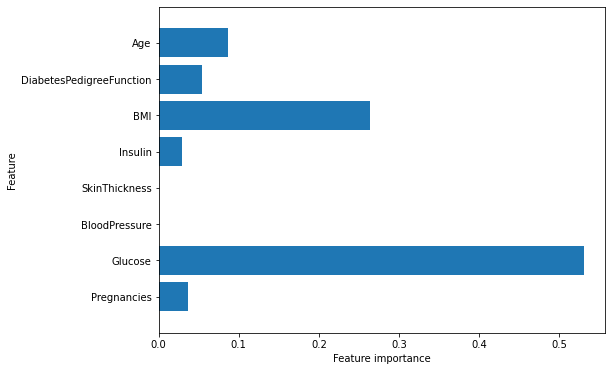

In [17]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(diabetes_dataset.columns))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

Kmeans Clustering

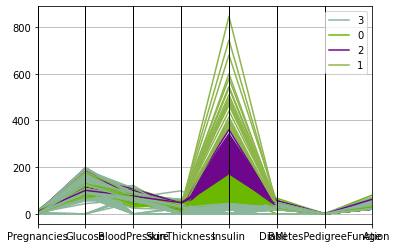

In [22]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X)
predict = kmeans.predict(X)
X['cluster'] = predict
pd.plotting.parallel_coordinates(X, 'cluster')